<font size="+3"><strong>5.5. Bankruptcy in Taiwan 🇹🇼</strong></font>

In [9]:
import wqet_grader

wqet_grader.init("Project 5 Assessment")

In [5]:
# Import libraries here
import gzip
import json
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact
from teaching_tools.widgets import ConfusionMatrixWidget

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline


# Prepare Data

## Import

**Task 5.5.1:** Load the contents of the `"data/taiwan-bankruptcy-data.json.gz"` and assign it to the variable <code>taiwan_data</code>. 

Note that <code>taiwan_data</code> should be a dictionary. You'll create a DataFrame in a later task.

In [7]:
# Load data file
with gzip.open("data/taiwan-bankruptcy-data.json.gz","r") as f:
    taiwan_data = json.load(f)
print(type(taiwan_data))

<class 'dict'>


In [10]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.1", taiwan_data["metadata"])

**Task 5.5.2:** Extract the key names from <code>taiwan_data</code> and assign them to the variable <code>taiwan_data_keys</code>.

<div class="alert alert-info" role="alert">
    <b>Tip:</b> The data in this assignment might be organized differently than the data from the project, so be sure to inspect it first. 
</div>

In [11]:
taiwan_data_keys = taiwan_data.keys()
print(taiwan_data_keys)

dict_keys(['schema', 'metadata', 'observations'])


In [25]:
taiwan_data["observations"][0]

{'id': 1,
 'bankrupt': True,
 'feat_1': 0.3705942573,
 'feat_2': 0.4243894461,
 'feat_3': 0.4057497725,
 'feat_4': 0.6014572133,
 'feat_5': 0.6014572133,
 'feat_6': 0.9989692032,
 'feat_7': 0.7968871459,
 'feat_8': 0.8088093609,
 'feat_9': 0.3026464339,
 'feat_10': 0.7809848502,
 'feat_11': 0.0001256969,
 'feat_12': 0.0,
 'feat_13': 0.4581431435,
 'feat_14': 0.0007250725,
 'feat_15': 0.0,
 'feat_16': 0.1479499389,
 'feat_17': 0.1479499389,
 'feat_18': 0.1479499389,
 'feat_19': 0.1691405881,
 'feat_20': 0.3116644267,
 'feat_21': 0.0175597804,
 'feat_22': 0.0959205276,
 'feat_23': 0.1387361603,
 'feat_24': 0.0221022784,
 'feat_25': 0.8481949945,
 'feat_26': 0.6889794628,
 'feat_27': 0.6889794628,
 'feat_28': 0.2175353862,
 'feat_29': 4980000000.0,
 'feat_30': 0.0003269773,
 'feat_31': 0.2630999837,
 'feat_32': 0.363725271,
 'feat_33': 0.0022589633,
 'feat_34': 0.0012077551,
 'feat_35': 0.629951302,
 'feat_36': 0.0212659244,
 'feat_37': 0.2075762615,
 'feat_38': 0.7924237385,
 'feat_39': 

In [12]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.2", list(taiwan_data_keys))

**Task 5.5.3:** Calculate how many companies are in `taiwan_data` and assign the result to `n_companies`. 

In [14]:
n_companies = len(taiwan_data["observations"])
print(n_companies)

6137


In [15]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.3", [n_companies])

**Task 5.5.4:** Calculate the number of features associated with each company and assign the result to `n_features`.

In [16]:
n_features = len(taiwan_data["observations"][0])
print(n_features)

97


In [17]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.4", [n_features])

**Task 5.5.5:** Create a `wrangle` function that takes as input the path of a compressed JSON file and returns the file's contents as a DataFrame. Be sure that the index of the DataFrame contains the ID of the companies. When your function is complete, use it to load the data into the DataFrame `df`.

In [26]:
# Create wrangle function
def wrangle(filename):
    
    # Open compressed file, load into dictionary
    with gzip.open(filename,"r") as f:
        data = json.load(f)
    
    # Load dictionary into DataFrame, set index
    df = pd.DataFrame().from_dict(data["observations"]).set_index("id")
    return df

In [27]:
df = wrangle("data/taiwan-bankruptcy-data.json.gz")
print(df.shape)
df.head()

(6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [28]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.5", df)

## Explore

**Task 5.5.6:** Is there any missing data in the dataset? Create a Series where the index contains the name of the columns in `df` and the values are the number of <code>NaN</code>s in each column. Assign the result to <code>nans_by_col</code>. Neither the Series itself nor its index require a name. 

In [30]:
nans_by_col = pd.Series(df.isna().sum(),index=df.columns)
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


bankrupt    0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
dtype: int64

In [31]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.6", nans_by_col)

**Task 5.5.7:** Is the data imbalanced? Create a bar chart that shows the normalized value counts for the column `df["bankrupt"]`. Be sure to label your x-axis `"Bankrupt"`, your y-axis `"Frequency"`, and use the title `"Class Balance"`.

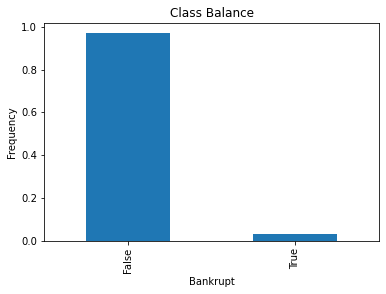

In [32]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bankrupt",
    ylabel="Frequency",
    title="Class Balance"
)
# Don't delete the code below 👇
plt.savefig("images/5-5-7.png", dpi=150)


In [33]:
with open("images/5-5-7.png", "rb") as file:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.7", file)

## Split

**Task 5.5.8:** Create your feature matrix `X` and target vector `y`. Your target is `"bankrupt"`. 

In [34]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


In [35]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.8a", X)

In [37]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.8b", y)

**Task 5.5.9:** Divide your dataset into training and test sets using a randomized split. Your test set should be 20% of your data. Be sure to set `random_state` to `42`.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size=0.2,random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


In [39]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.9", list(X_train.shape))

## Resample

**Task 5.5.10:** Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on the training data. Be sure to set the `random_state` to `42`.

In [40]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


In [41]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.10", list(X_train_over.shape))

# Build Model

## Iterate

**Task 5.5.11:** Create a classifier <code>clf</code> that can be trained on `(X_train_over, y_train_over)`. You can use any of the predictors you've learned about in the Data Science Lab. 

In [44]:
clf = GradientBoostingClassifier()

In [45]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.11", clf)

**Task 5.5.12:** Perform cross-validation with your classifier using the over-sampled training data, and assign your results to <code>cv_scores</code>. Be sure to set the <code>cv</code> argument to 5. 

<div class="alert alert-info" role="alert">
    <p><b>Tip:</b> Use your CV scores to evaluate different classifiers. Choose the one that gives you the best scores.</p>
</div>

In [46]:
cv_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1,verbose=True)
print(cv_scores)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.96952181 0.97162375 0.96950578 0.97160883 0.96845426]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


In [47]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.12", list(cv_scores))

**Ungraded Task:** Create a dictionary <code>params</code> with the range of hyperparameters that you want to evaluate for your classifier. If you're not sure which hyperparameters to tune, check the [scikit-learn](https://scikit-learn.org/stable/) documentation for your predictor for ideas.

<div class="alert alert-info" role="alert">
<p><b>Tip:</b> If the classifier you built is a predictor only (not a pipeline with multiple steps), you don't need to include the step name in the keys of your <code>params</code> dictionary. For example, if your classifier was only a random forest (not a pipeline containing a random forest), your would access the number of estimators using <code>"n_estimators"</code>, not <code>"randomforestclassifier__n_estimators"</code>.</p>
</div>

In [52]:
params = params = {
"n_estimators":range(20,31,5),
"max_depth":range(2,5)
}

**Task 5.5.13:** Create a <code>GridSearchCV</code> named `model` that includes your classifier and hyperparameter grid. Be sure to set `cv` to 5, `n_jobs` to -1, and `verbose` to 1. 

In [53]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [54]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.13", model)

**Ungraded Task:** Fit your model to the over-sampled training data. 

In [55]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 31, 5)},
             verbose=1)

**Task 5.5.14:** Extract the cross-validation results from your model, and load them into a DataFrame named <code>cv_results</code>. Looking at the results, which set of hyperparameters led to the best performance?

In [56]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.957644,0.027775,0.016976,0.025195,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.909616,0.897530,0.903260,0.905363,0.906414,0.904437,0.004017,9
1,4.963715,0.037588,0.017190,0.025597,2,25,"{'max_depth': 2, 'n_estimators': 25}",0.912769,0.913820,0.917455,0.913775,0.912198,0.914004,0.001832,8
2,5.942686,0.037942,0.016537,0.023934,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.923279,0.917499,0.916930,0.923239,0.919558,0.920101,0.002723,7
3,5.759468,0.077517,0.004418,0.000072,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.929585,0.930636,0.932177,0.934805,0.931651,0.931771,0.001758,6
4,7.161945,0.031129,0.004496,0.000113,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.935365,0.931687,0.939537,0.937434,0.935331,0.935871,0.002605,5


In [57]:

wqet_grader.grade("Project 5 Assessment", "Task 5.5.14", cv_results)

**Task 5.5.15:** Extract the best hyperparameters from your model and assign them to <code>best_params</code>. 

In [58]:
best_params = model.best_params_
print(best_params)

{'max_depth': 4, 'n_estimators': 30}


In [59]:
wqet_grader.grade(
    "Project 5 Assessment", "Task 5.5.15", [isinstance(best_params, dict)]
)

## Evaluate

**Ungraded Task:** Test the quality of your model by calculating accuracy scores for the training and test data.

In [60]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 0.9466
Model Test Accuracy: 0.9389


**Task 5.5.16:** Plot a confusion matrix that shows how your model performed on your test set.

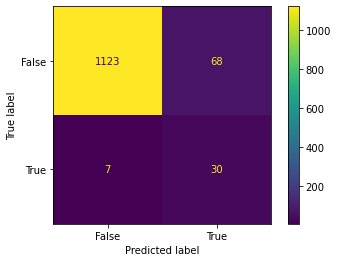

In [61]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);
# Don't delete the code below 👇
plt.savefig("images/5-5-16.png", dpi=150)


In [62]:
with open("images/5-5-16.png", "rb") as file:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.16", file)

**Task 5.5.17:** Generate a classification report for your model's performance on the test data and assign it to `class_report`.

In [63]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.99      0.94      0.97      1191
        True       0.31      0.81      0.44        37

    accuracy                           0.94      1228
   macro avg       0.65      0.88      0.71      1228
weighted avg       0.97      0.94      0.95      1228



In [64]:
wqet_grader.grade("Project 5 Assessment", "Task 5.5.17", class_report)

# Communicate

**Task 5.5.18:** Create a horizontal bar chart with the 10 most important features for your model. Be sure to label the x-axis `"Gini Importance"`, the y-axis `"Feature"`, and use the title `"Feature Importance"`.

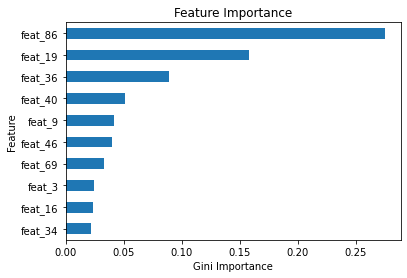

In [66]:

features = X_train_over.columns

importances = model.best_estimator_.feature_importances_

feat_imp = pd.Series(importances,index=features).sort_values()

feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
# Don't delete the code below 👇
plt.savefig("images/5-5-17.png", dpi=150)


In [67]:
with open("images/5-5-17.png", "rb") as file:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.18", file)

**Task 5.5.19:** Save your best-performing model to a a file named <code>"model-5-5.pkl"</code>.

In [68]:
# Save model
with open("model-5-5.pkl","wb") as f:
    pickle.dump(model,f)

In [69]:

with open("model-5-5.pkl", "rb") as f:
    wqet_grader.grade("Project 5 Assessment", "Task 5.5.19", pickle.load(f))

Exception: Could not grade submission: Could not verify access to this assessment: Received error from WQET submission API: You have already passed this course!

**Task 5.5.20:** Open the file <code>my_predictor_assignment.py</code>. Add your `wrangle` function, and then create a `make_predictions` function that takes two arguments: `data_filepath` and <code>model_filepath</code>. Use the cell below to test your module. When you're satisfied with the result, submit it to the grader. 

In [74]:
# Import your module
from my_predictor_assignment import make_predictions

# Generate predictions
y_test_pred = make_predictions(
    data_filepath="data/taiwan-bankruptcy-data-test-features.json.gz",
    model_filepath="model-5-5.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (682,)


id
18    False
20    False
24     True
32     True
38    False
Name: bankrupt, dtype: bool

<div class="alert alert-info" role="alert">
    <b>Tip:</b> If you get an <code style="color:#E45E5C;background-color:#FEDDDE">ImportError</code> when you try to import <code>make_predictions</code> from <code>my_predictor_assignment</code>, try restarting your kernel. Go to the <b>Kernel</b> menu and click on  <b>Restart Kernel and Clear All Outputs</b>. Then rerun just the cell above. ☝️
</div>

In [75]:
wqet_grader.grade(
    "Project 5 Assessment",
    "Task 5.5.20",
    make_predictions(
        data_filepath="data/taiwan-bankruptcy-data-test-features.json.gz",
        model_filepath="model-5-5.pkl",
    ),
)

Exception: Could not grade submission: Could not verify access to this assessment: Received error from WQET submission API: You have already passed this course!

---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
